# Importing Necessary Libraries For Work

In [ ]:
!pip install chart_studio
!pip install cufflinks
!pip install plotly
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 1.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy     as np
import pandas    as pd

# Options for pandas
pd.options.display.max_columns = 30

import matplotlib.pyplot as plt
import seaborn   as sns
import pylab
import calendar
from   scipy import stats as sci
import missingno as msno
from   datetime import datetime

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs   as go
from   plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Set global theme
cufflinks.set_config_file(world_readable=True, theme="pearl")

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import plotly.io as pio
pio.renderers.default = "colab"

# Warnings
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

# Drive connect to get the data.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



# Data Loading exported From Notebook2 data_preprocssing
loading one data set for october sales and the other for november then combining Them


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_preprocessed.csv')
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,count_user,count_brand,count_event_tye,count_product,count_session,count_sessions_type,...,view,no_purchase,yes_purchase,accessories.bag,accessories.cosmetic_bag,apparel.glove,appliances.environment.air_conditioner,appliances.environment.vacuum,appliances.personal.hair_cutter,furniture.bathroom.bath,furniture.living_room.cabinet,furniture.living_room.chair,other,sport.diving,stationery.cartrige
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,58,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,46,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,other,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,95,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,767,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,other,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,482,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738115,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738116,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738117,2019-11-30 23:59:37 UTC,view,5699730,1487580004882580302,other,estel,2.70,422196217,dd6d8240-0896-4965-9344-110648581a51,20,119933,3938296,191,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738118,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,other,ellips,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,5,2862,3938296,1469,2.0,2.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


After concatenate data now we have 8738120 instance 

In [ ]:
df = data.copy()
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,count_user,count_brand,count_event_tye,count_product,count_session,count_sessions_type,...,view,no_purchase,yes_purchase,accessories.bag,accessories.cosmetic_bag,apparel.glove,appliances.environment.air_conditioner,appliances.environment.vacuum,appliances.personal.hair_cutter,furniture.bathroom.bath,furniture.living_room.cabinet,furniture.living_room.chair,other,sport.diving,stationery.cartrige
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,58,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,46,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,other,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,95,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,767,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,other,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,482,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738115,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738116,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738117,2019-11-30 23:59:37 UTC,view,5699730,1487580004882580302,other,estel,2.70,422196217,dd6d8240-0896-4965-9344-110648581a51,20,119933,3938296,191,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738118,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,other,ellips,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,5,2862,3938296,1469,2.0,2.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


####Getting the size of the dataset.

In [ ]:
df.shape 

(8738120, 38)

###describe our data through some statistic methods

In [ ]:
df.describe()

,product_id,category_id,price,user_id,count_user,count_brand,count_event_tye,count_product,count_session,count_sessions_type,hour,year,cart,purchase,remove_from_cart,view,no_purchase,yes_purchase,accessories.bag,accessories.cosmetic_bag,apparel.glove,appliances.environment.air_conditioner,appliances.environment.vacuum,appliances.personal.hair_cutter,furniture.bathroom.bath,furniture.living_room.cabinet,furniture.living_room.chair,other,sport.diving,stationery.cartrige
count,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.736670e+06,8.736670e+06,8.738120e+06,8738120.0,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06
mean,5.475330e+06,1.547985e+18,8.315165e+00,5.042412e+08,1.160473e+02,1.021762e+05,2.878619e+06,7.951033e+02,4.969375e+01,2.579578e+01,1.296485e+01,2019.0,2.911601e-01,6.500723e-02,1.931298e-01,4.507029e-01,9.349928e-01,6.500723e-02,1.336786e-03,1.428225e-04,2.086490e-03,3.799444e-05,6.839114e-03,1.880267e-04,1.128046e-03,1.537974e-03,3.524786e-05,9.836092e-01,2.288822e-07,3.058095e-03
std,1.313266e+06,1.606052e+17,1.895403e+01,8.354095e+07,4.316695e+02,1.111909e+05,1.076888e+06,2.196348e+03,1.155199e+02,7.924155e+01,5.471695e+00,0.0,4.542972e-01,2.465386e-01,3.947539e-01,4.975639e-01,2.465386e-01,2.465386e-01,3.653765e-02,1.194998e-02,4.563044e-02,6.163846e-03,8.241566e-02,1.371099e-02,3.356745e-02,3.918684e-02,5.936886e-03,1.269731e-01,4.784163e-04,5.521543e-02
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06,1.000000e+00,1.000000e+00,5.680410e+05,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.723503e+06,1.487580e+18,2.050000e+00,4.694674e+08,1.000000e+01,1.834300e+04,1.687591e+06,6.400000e+01,5.000000e+00,3.000000e+00,9.000000e+00,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.809910e+06,1.487580e+18,3.970000e+00,5.405799e+08,3.400000e+01,5.343000e+04,2.544192e+06,1.870000e+02,2.000000e+01,9.000000e+00,1.300000e+01,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,5.854158e+06,1.487580e+18,6.780000e+00,5.611356e+08,9.700000e+01,1.699080e+05,3.938296e+06,5.820000e+02,5.300000e+01,2.400000e+01,1.800000e+01,2019.0,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.909246e+06,2.195085e+18,3.277800e+02,5.799699e+08,9.402000e+03,3.492000e+05,3.938296e+06,2.728700e+04,2.854000e+03,2.605000e+03,2.300000e+01,2019.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


###know some more info about our data like data types & memory usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738120 entries, 0 to 8738119
Data columns (total 38 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   event_time                              object 
 1   event_type                              object 
 2   product_id                              int64  
 3   category_id                             int64  
 4   category_code                           object 
 5   brand                                   object 
 6   price                                   float64
 7   user_id                                 int64  
 8   user_session                            object 
 9   count_user                              int64  
 10  count_brand                             int64  
 11  count_event_tye                         int64  
 12  count_product                           int64  
 13  count_session                           float64
 14  count_sessions_type               

As we can see from above info() method, all the datatypes are correctly available. Hours is available as int64. Since hours is only used for grouping and other data analysis related works, its okay to have it in int64 format. Lets quickly check the minimum, average, maximum and other statics related to the numerical columns.

### counting unique values for each column

In [ ]:
df.apply(lambda x:len(x.unique()))

NameError: ignored

### Checking for nulls and its percentage

In [ ]:
# number of missing values and its percent
total = round(df.isnull().sum(),2).sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent' + '%'])
missing_data

,Total,Percent%
count_sessions_type,1450,0.02
count_session,1450,0.02
user_session,1450,0.02
event_time,0,0.00
apparel.glove,0,0.00
view,0,0.00
no_purchase,0,0.00
yes_purchase,0,0.00
accessories.bag,0,0.00
accessories.cosmetic_bag,0,0.00


#### Visualizing the Nulls Using heatmap

<Axes: >

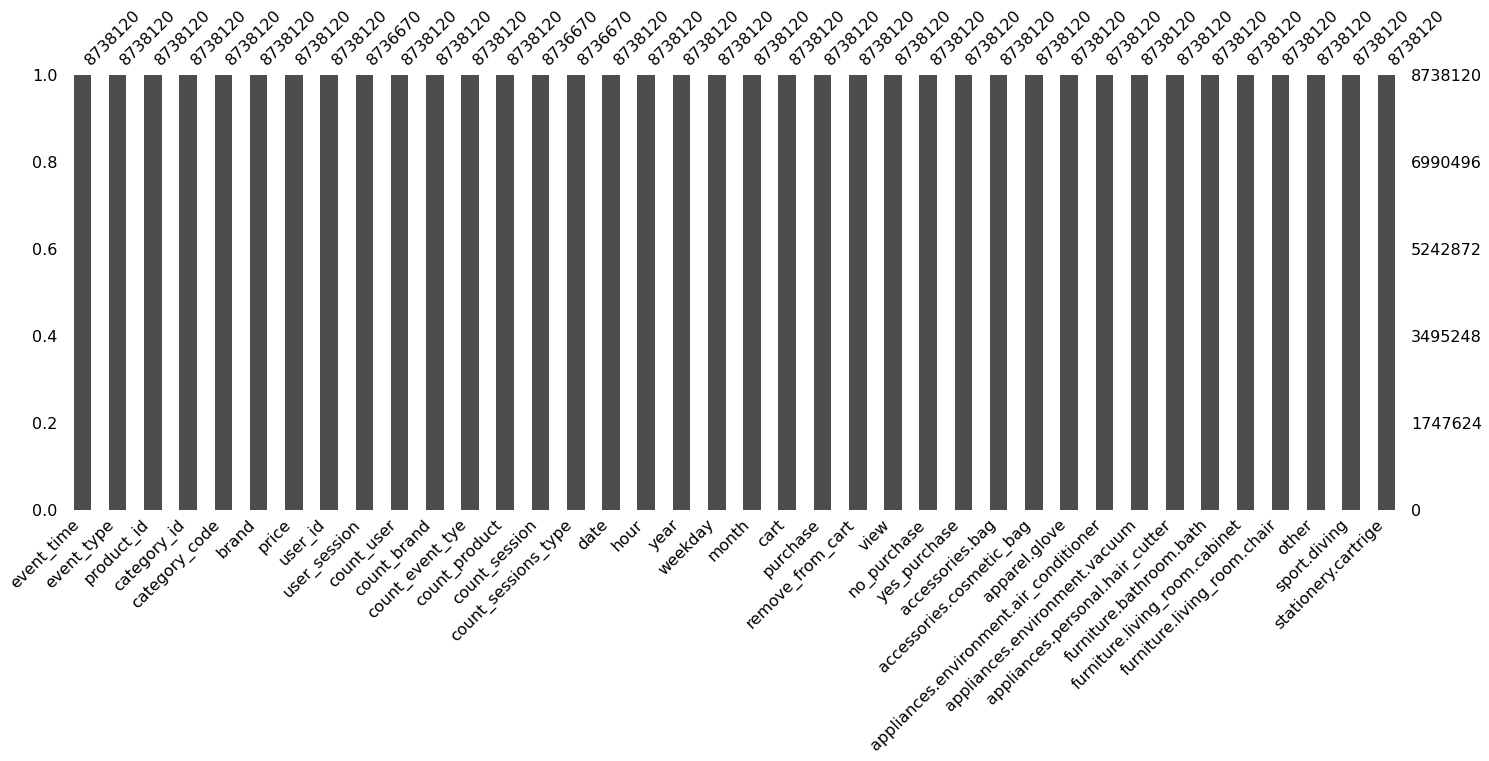

In [ ]:
msno.bar(df
            , figsize = (24, 8),color=(0.3, 0.3, 0.3)
            , fontsize=16
            , labels=None
            , label_rotation=45
           )

### See the correlation in the data


<Figure size 2160x2160 with 0 Axes>

<Axes: >

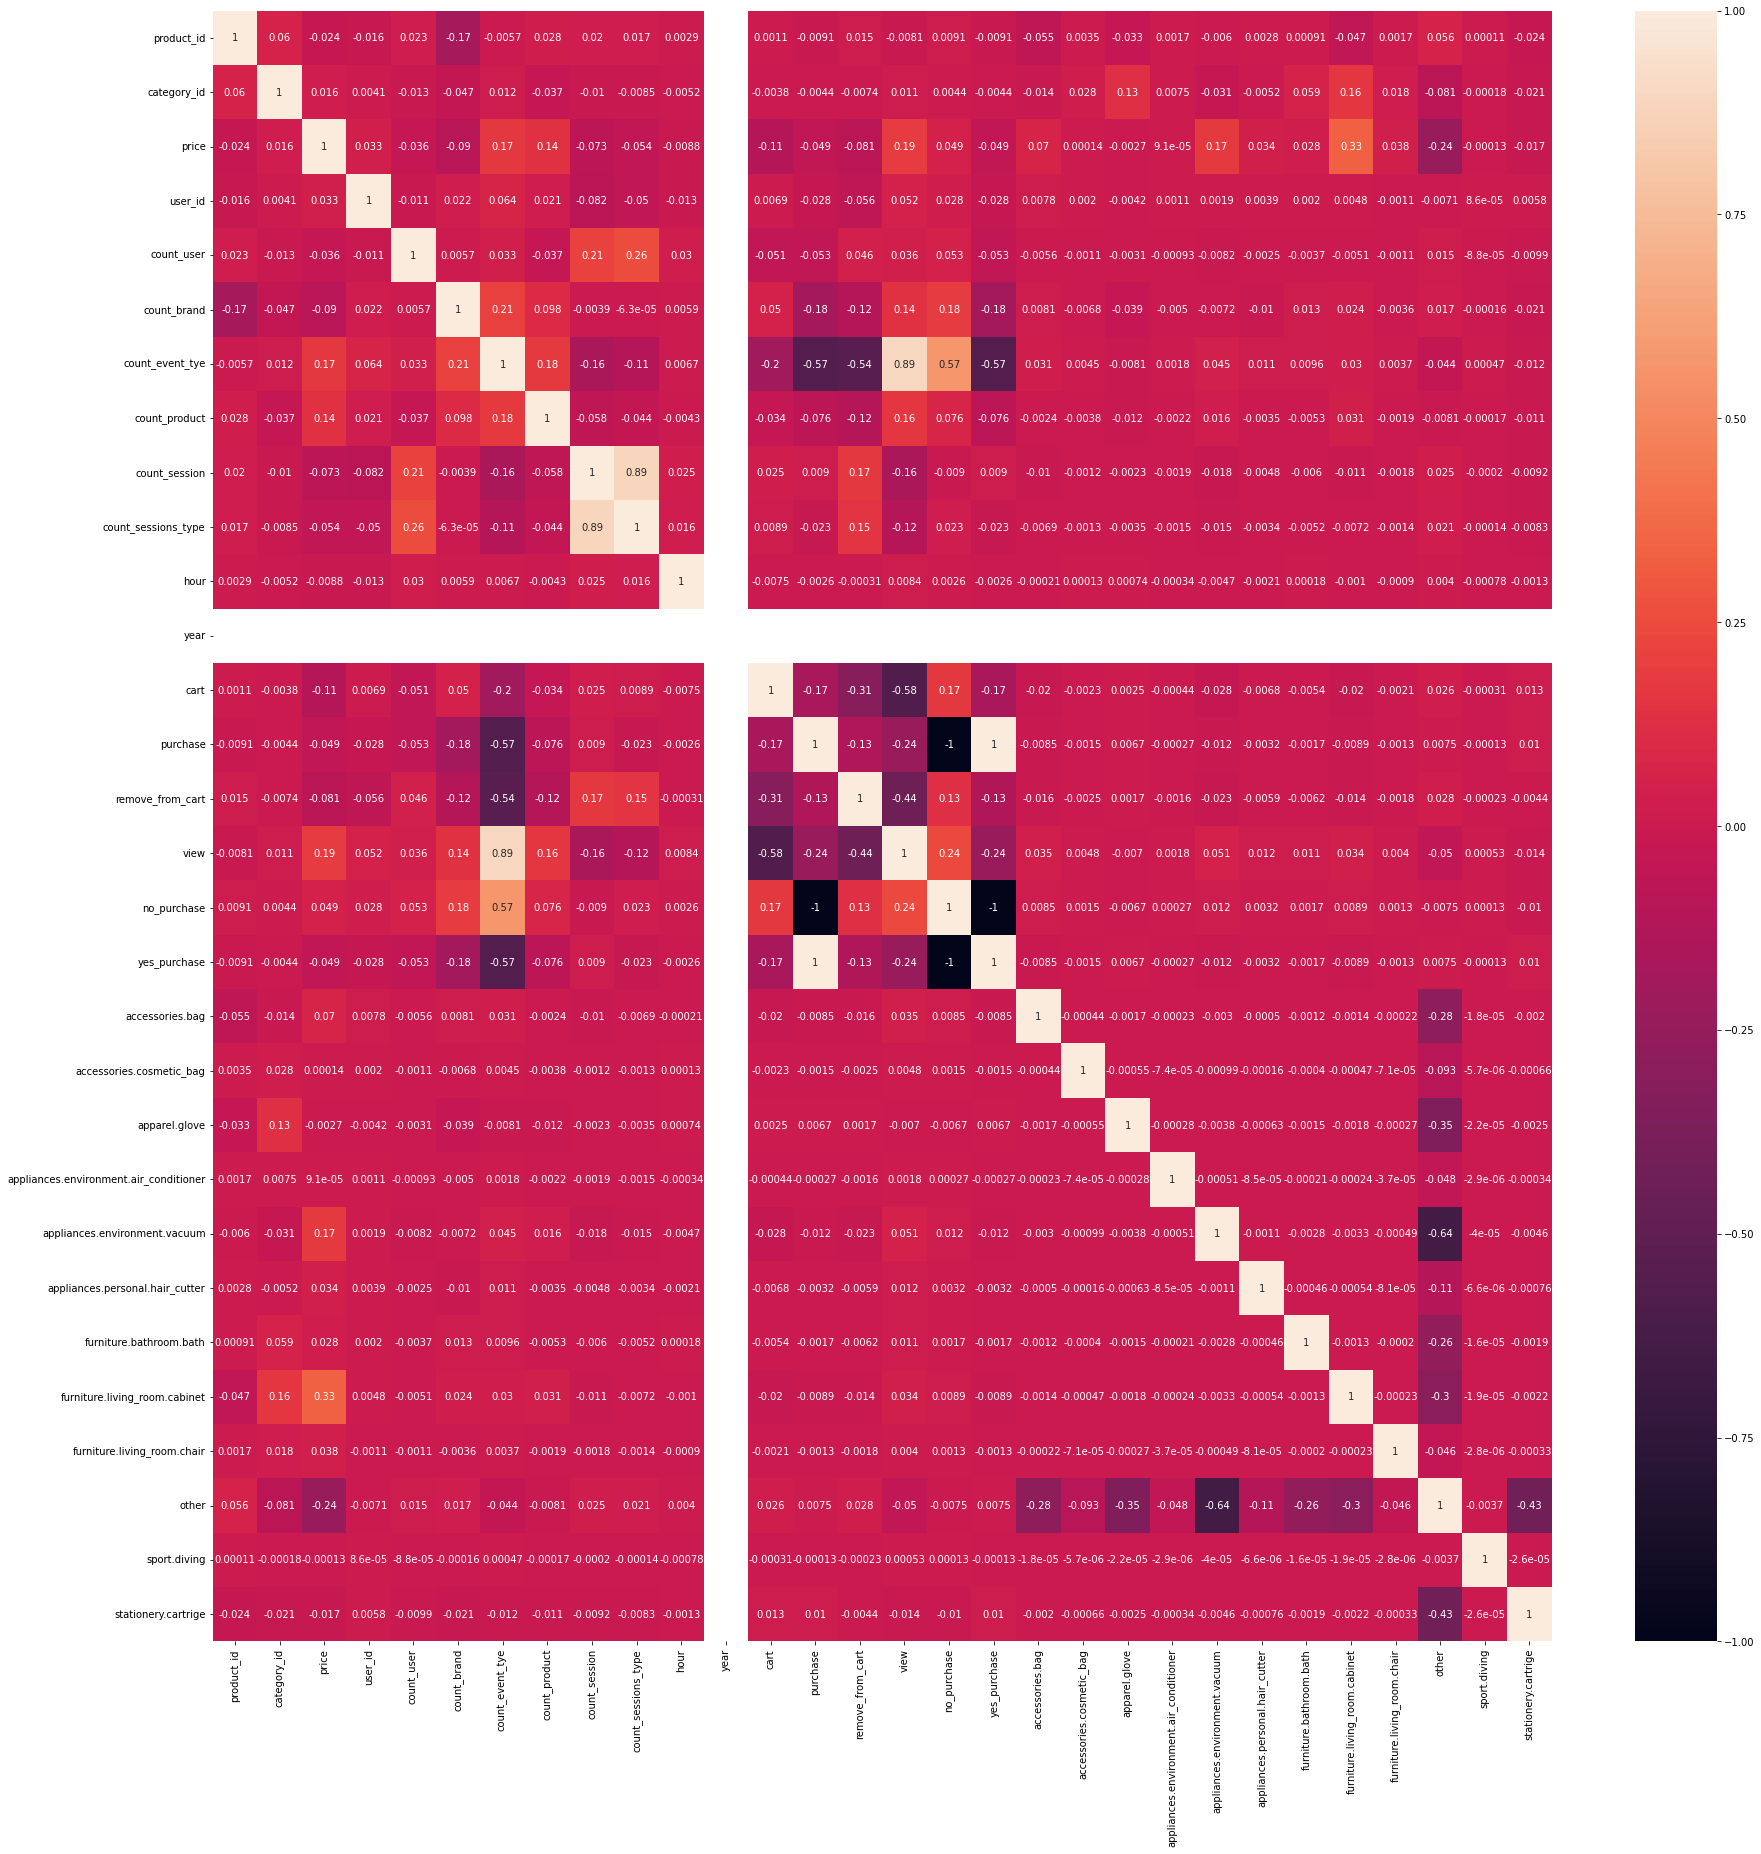

In [ ]:
#df.corr()
df_mask = np.array(df.corr())
df_mask[np.tril_indices_from(df_mask)] = False
## resizing the figure 
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(),  annot = True)

### SHOWING THE MOST COMMON BRAND AND TOTAL SALES OF EACH BRAND

In [ ]:
# number of brands and the percent of frequency from whol data , and their reveneu
total_sales= df[df['event_type'] == 'purchase'].groupby('brand')['price'].sum().sort_values(ascending=False)
total = df.brand.value_counts().sort_values(ascending=False)
percent = (df.brand.value_counts()/df.brand.value_counts().sum()*100).sort_values(ascending=False)
brand_prcent = pd.concat([total, percent,total_sales], axis=1, keys=['Total', 'Percent','total_sales'])
brand_prcent

,Total,Percent,total_sales
irisk,935913,10.710691,195032.72
runail,864025,9.887997,212596.30
masura,642970,7.358219,122292.71
grattol,347942,3.981886,110404.24
ingarden,338591,3.874872,92100.12
...,...,...,...
invisibobble,10,0.000114,NaN
voesh,8,0.000092,NaN
dessata,4,0.000046,NaN
shifei,4,0.000046,NaN


### EVENT_TYPE COLUMN

##### PLOT THE PERCENTAGE OF EACH EVENT 

<Figure size 720x576 with 0 Axes>

<Axes: ylabel='event_type'>

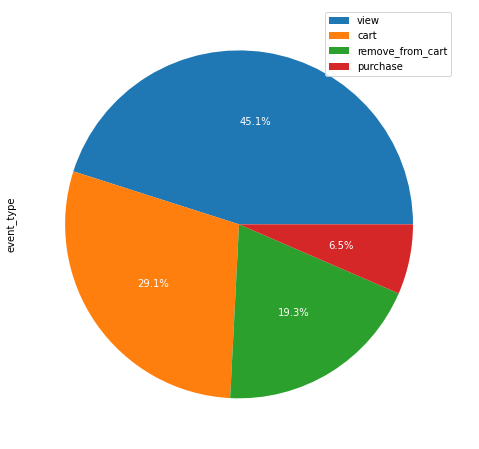

In [ ]:
plt.figure(figsize=(10,8))
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%',textprops=dict(color="w"),legend=True)

as we can see number of viwes items have arround 45% from all events 
As we can see there are four event_types out of which "Remove_from_cart" is a event which all users might not go through during their journey.
as we can see number of viwes items have arround 45% from all events

In [ ]:
#how many unique customer 
customer_info = df[['user_id','event_type']]
unq = list(customer_info['user_id'].unique())
print('unique_customer ',len(unq))

unique_customer  713100


##### CALCULATE THE NUMBER OF VIWES

In [ ]:
view_df = customer_info[customer_info['event_type']=='view']
view_df = view_df.groupby(['user_id']).size().reset_index(name='count')
view_dict={x:y for x,y in zip(view_df['user_id'].to_list(),view_df['count'].to_list())}

print('no .of views in all brand =', len(view_dict))

no .of views in all brand = 693009


##### CALCULATE THE NUMBER OF CART

In [ ]:
cart_df = df[df['event_type']=='cart']
cart_df = cart_df.groupby(['user_id']).size().reset_index(name='count')
cart_dict={x:y for x,y in zip(cart_df['user_id'].to_list(),cart_df['count'].to_list())}
print('no .of cart in all brand =',len(cart_dict))

no .of cart in all brand = 210620


##### CALCULATE THE NUMBER PURCHASES

In [ ]:
purchase_df = customer_info[customer_info['event_type'] =='purchase']
purchase_df = purchase_df.groupby(['user_id']).size().reset_index(name ='count')
purchase_dict={x:y for x,y in zip(purchase_df['user_id'].to_list(),purchase_df['count'].to_list())}

print('no .of purchases in all brand =',len(purchase_dict))


no .of purchases in all brand = 52523


##### TOP PURCHASED

In [ ]:

def top_purchased(n , dict_, dict_1 ):
    '''
    returns a list of tuples of top n number of evnts in dict and dict1 for same user.priority is max number in dict
    '''
    lst = list()
    for k in dict_.keys():
        tuple_ = (dict_.get(k,0),k)
        lst.append(tuple_)
    lst.sort()
    lst.reverse()
    
    lst1 = []
    for i in range(n):
        tuple_= lst[i]
        tuple1_=tuple((tuple_[0],dict_1.get(tuple_[1],0)))
        #print(tuple1_)
        lst1.append(tuple1_)
    
    return lst1

In [ ]:
top_purchase = pd.DataFrame()
lt = top_purchased(10000,purchase_dict,cart_dict)
top_purchase = pd.DataFrame(data=lt,columns=['purchase','cart'])
tmp = pd.DataFrame(data=top_purchased(10000,purchase_dict,view_dict),columns=['purchase','view'])
top_purchase['view'] = tmp['view']

In [ ]:
top_purchase

,purchase,cart,view
0,438,844,283
1,329,357,10
2,256,325,4
3,236,930,56
4,230,402,32
...,...,...,...
9995,16,33,42
9996,16,16,3
9997,16,48,216
9998,16,26,9


##### COMPARE PURCHASES BETWEEN OCTOBER AND NOVEMBER

In [ ]:
# revenu for oct and nov
purchased = df[['event_type', 'month', 'price']]
purchased = purchased[purchased['event_type']=='purchase']
purchased.groupby('month')['price'].sum()

month
November    1531016.90
October     1211538.43
Name: price, dtype: float64

##### USER EVENT BY MONTH

<Figure size 1728x576 with 0 Axes>

<Axes: xlabel='month,event_type'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(November, cart)'),
  Text(1, 0, '(November, purchase)'),
  Text(2, 0, '(November, remove_from_cart)'),
  Text(3, 0, '(November, view)'),
  Text(4, 0, '(October, cart)'),
  Text(5, 0, '(October, purchase)'),
  Text(6, 0, '(October, remove_from_cart)'),
  Text(7, 0, '(October, view)')])

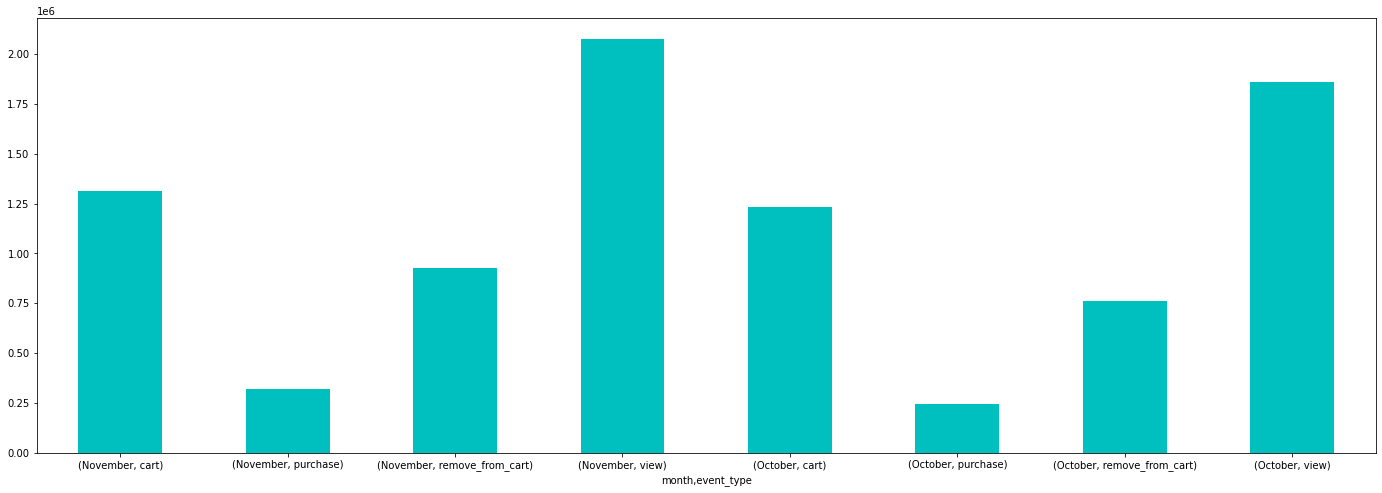

In [ ]:
plt.figure(figsize=(24,8))
df.groupby(['month','event_type'])['event_type'].count().plot(kind='bar', color = 'c')
plt.xticks(rotation = 0)

Text(0.5, 0, 'Product Id')

Text(0, 0.5, 'User_id')

<BarContainer object of 30 artists>

[Text(0.5, 0, '5809910'),
 Text(1.5, 0, '5854897'),
 Text(2.5, 0, '5751422'),
 Text(3.5, 0, '5700037'),
 Text(4.5, 0, '5802432'),
 Text(5.5, 0, '5304'),
 Text(6.5, 0, '5751383'),
 Text(7.5, 0, '5815662'),
 Text(8.5, 0, '5792800'),
 Text(9.5, 0, '5849033'),
 Text(10.5, 0, '5809912'),
 Text(11.5, 0, '5833330'),
 Text(12.5, 0, '5686925'),
 Text(13.5, 0, '5833325'),
 Text(14.5, 0, '5013'),
 Text(15.5, 0, '5833326'),
 Text(16.5, 0, '5700046'),
 Text(17.5, 0, '5528035'),
 Text(18.5, 0, '5833334'),
 Text(19.5, 0, '5759492'),
 Text(20.5, 0, '5729864'),
 Text(21.5, 0, '5809911'),
 Text(22.5, 0, '5687151'),
 Text(23.5, 0, '5843836'),
 Text(24.5, 0, '5688124'),
 Text(25.5, 0, '5816170'),
 Text(26.5, 0, '5622677'),
 Text(27.5, 0, '5749149'),
 Text(28.5, 0, '5759491'),
 Text(29.5, 0, '5817702')]

Text(0.5, 1.0, 'Top 30 Product')

[Text(0, 0, '2449'),
 Text(0, 0, '1865'),
 Text(0, 0, '1578'),
 Text(0, 0, '1568'),
 Text(0, 0, '1445'),
 Text(0, 0, '1389'),
 Text(0, 0, '1368'),
 Text(0, 0, '1364'),
 Text(0, 0, '1308'),
 Text(0, 0, '1201'),
 Text(0, 0, '1190'),
 Text(0, 0, '1172'),
 Text(0, 0, '1024'),
 Text(0, 0, '842'),
 Text(0, 0, '824'),
 Text(0, 0, '804'),
 Text(0, 0, '765'),
 Text(0, 0, '760'),
 Text(0, 0, '739'),
 Text(0, 0, '733'),
 Text(0, 0, '715'),
 Text(0, 0, '699'),
 Text(0, 0, '691'),
 Text(0, 0, '671'),
 Text(0, 0, '654'),
 Text(0, 0, '653'),
 Text(0, 0, '648'),
 Text(0, 0, '627'),
 Text(0, 0, '607'),
 Text(0, 0, '606')]

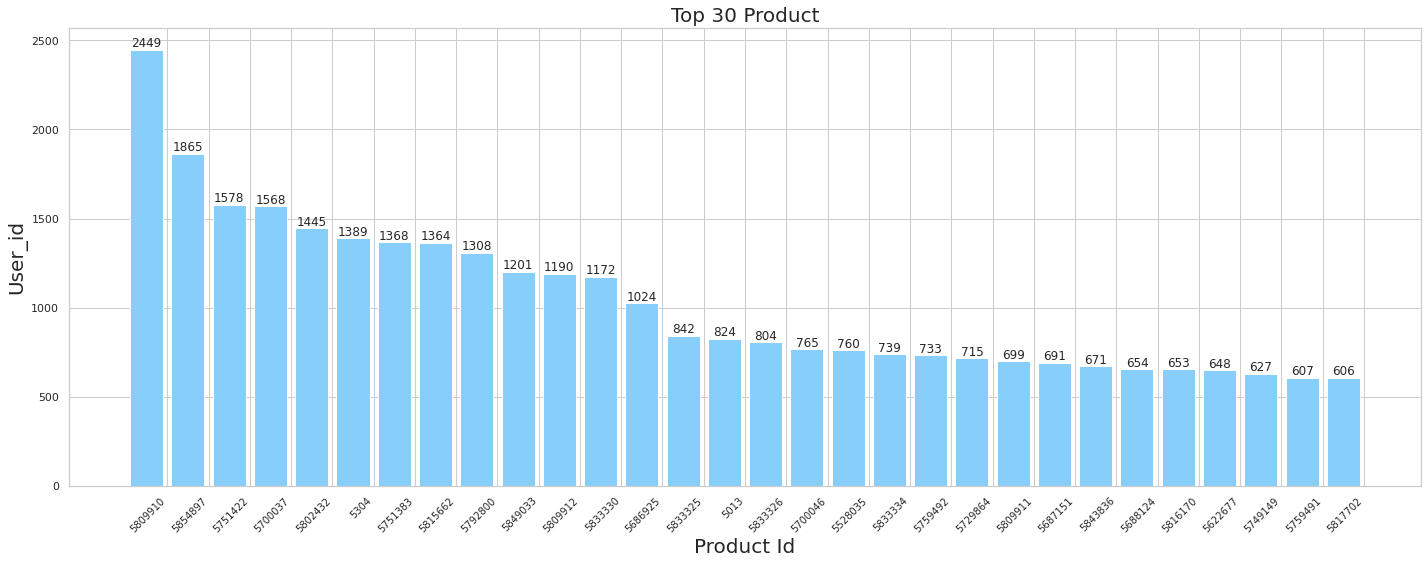

In [ ]:
  
df_purchase = df[df['event_type'].str.contains(r'purchase')]
event_type_count5 = df_purchase.groupby(["product_id"]).count()
event_type_count5.drop(["event_time","event_type","price","month"], axis = 1, inplace=True)
event_type_count5.sort_values(by='user_id', ascending=False, inplace=True)
event_type_count5['Product Id'] = event_type_count5.index
event5 = event_type_count5.head(30)

####
sns.set_theme(style = 'whitegrid')

x = event5["Product Id"]
y = event5["user_id"]
fig, ax = plt.subplots(figsize=(20,8))

plt.xlabel("Product Id",size=20)
plt.ylabel("User_id",size=20)

ax.bar([idx for idx in range(len(x))], y, color='lightskyblue')
ax.set_xticks([idx+0.5 for idx in range(len(x))])
ax.set_xticklabels(x, rotation=45, ha='right', size=10)
ax.set_title("Top 30 Product", size=20)
for bars in ax.containers:
    ax.bar_label(bars)
fig.tight_layout()
plt.show()

### Price Column

In [ ]:
# may be negative price is returned product 
# let's see number of them 
returned_order = df[df['price'] < 0]['price'].count()
print('no .of returned order =', returned_order)

no .of returned order = 37


There are 37 returned orders which is 0.00001 of total orders.

In [ ]:
# exclude this product from the data
#df=df[df['price'] >= 0]

### BRAND COLUMN 

##### EXPLORE THE BRANDS WE HAVE AND THIER FREQUENCY

In [ ]:
print('no. of brands = ', df.brand.nunique())
df.brand.value_counts()

no. of brands =  244


irisk           935913
runail          864025
masura          642970
grattol         347942
ingarden        338591
                 ...  
invisibobble        10
voesh                8
dessata              4
shifei               4
vl-gel               3
Name: brand, Length: 244, dtype: int64

we have 244 brand , the irisk brand have most repeates in the data 

### PRODUCT_ID COLUMN

##### EXPLORE THE NUMBER OF PRODUCTS WE HAVE

In [ ]:
product = df["product_id"].value_counts()
print('no.of products: ',len(product))

no.of products:  45960


##### PRODUCTS DESCRIBTION

In [ ]:
product.describe()

count    45960.000000
mean       190.124456
std        568.541504
min          1.000000
25%         21.000000
50%         64.000000
75%        169.000000
max      41903.000000
Name: product_id, dtype: float64

In [ ]:
# most_product_purchased 
prod = product.sort_values(ascending=False) 
len(prod[prod > 1000])

1470

In [ ]:
# lets say that is proudct need promotion when values_count >100 ,product that need to attention
prod_less_than_50 = prod[prod <= 50].index.tolist()

In [ ]:
len(prod_less_than_50)

20159

##### TOP 30 PURCHASED PRODUCTS

This is the Top 30 products based on how many users purchased these products

Text(0.5, 0, 'Product Id')

Text(0, 0.5, 'User_id')

<BarContainer object of 30 artists>

[Text(0.5, 0, '5809910'),
 Text(1.5, 0, '5854897'),
 Text(2.5, 0, '5751422'),
 Text(3.5, 0, '5700037'),
 Text(4.5, 0, '5802432'),
 Text(5.5, 0, '5304'),
 Text(6.5, 0, '5751383'),
 Text(7.5, 0, '5815662'),
 Text(8.5, 0, '5792800'),
 Text(9.5, 0, '5849033'),
 Text(10.5, 0, '5809912'),
 Text(11.5, 0, '5833330'),
 Text(12.5, 0, '5686925'),
 Text(13.5, 0, '5833325'),
 Text(14.5, 0, '5013'),
 Text(15.5, 0, '5833326'),
 Text(16.5, 0, '5700046'),
 Text(17.5, 0, '5528035'),
 Text(18.5, 0, '5833334'),
 Text(19.5, 0, '5759492'),
 Text(20.5, 0, '5729864'),
 Text(21.5, 0, '5809911'),
 Text(22.5, 0, '5687151'),
 Text(23.5, 0, '5843836'),
 Text(24.5, 0, '5688124'),
 Text(25.5, 0, '5816170'),
 Text(26.5, 0, '5622677'),
 Text(27.5, 0, '5749149'),
 Text(28.5, 0, '5759491'),
 Text(29.5, 0, '5817702')]

Text(0.5, 1.0, 'Top 30 Product')

[Text(0, 0, '2449'),
 Text(0, 0, '1865'),
 Text(0, 0, '1578'),
 Text(0, 0, '1568'),
 Text(0, 0, '1445'),
 Text(0, 0, '1389'),
 Text(0, 0, '1368'),
 Text(0, 0, '1364'),
 Text(0, 0, '1308'),
 Text(0, 0, '1201'),
 Text(0, 0, '1190'),
 Text(0, 0, '1172'),
 Text(0, 0, '1024'),
 Text(0, 0, '842'),
 Text(0, 0, '824'),
 Text(0, 0, '804'),
 Text(0, 0, '765'),
 Text(0, 0, '760'),
 Text(0, 0, '739'),
 Text(0, 0, '733'),
 Text(0, 0, '715'),
 Text(0, 0, '699'),
 Text(0, 0, '691'),
 Text(0, 0, '671'),
 Text(0, 0, '654'),
 Text(0, 0, '653'),
 Text(0, 0, '648'),
 Text(0, 0, '627'),
 Text(0, 0, '607'),
 Text(0, 0, '606')]

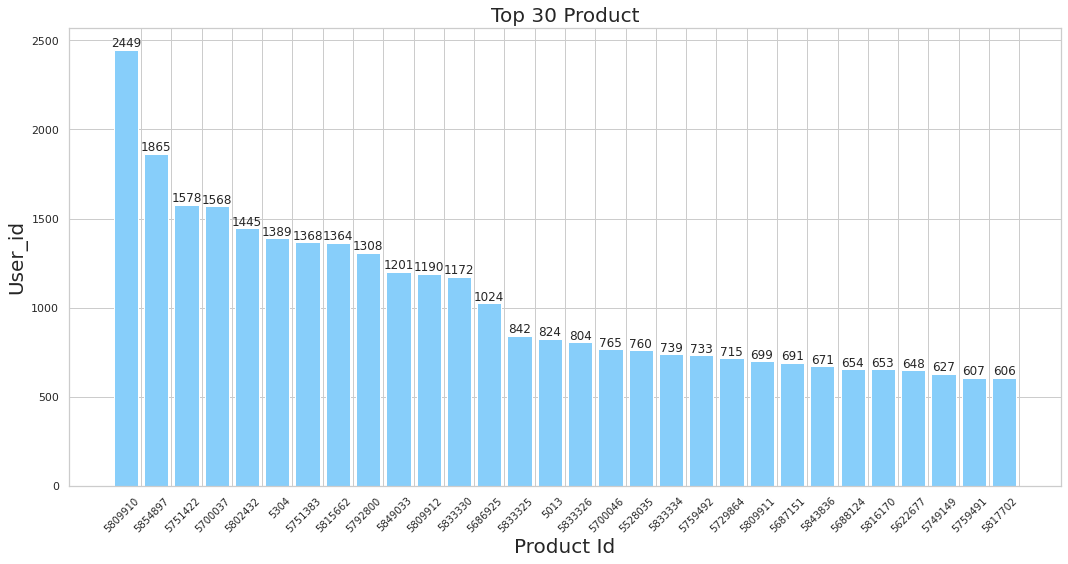

In [ ]:
# top 30 product
df_purchase = df[df['event_type'].str.contains(r'purchase')]
event_type_count5 = df_purchase.groupby(["product_id"]).count()
event_type_count5.drop(["event_time","event_type","price","month"], axis = 1, inplace=True)
event_type_count5.sort_values(by='user_id', ascending=False, inplace=True)
event_type_count5['Product Id'] = event_type_count5.index
event5 = event_type_count5.head(30)

####
sns.set_theme(style = 'whitegrid')

x = event5["Product Id"]
y = event5["user_id"]
fig, ax = plt.subplots(figsize=(15,8))

plt.xlabel("Product Id",size=20)
plt.ylabel("User_id",size=20)

ax.bar([idx for idx in range(len(x))], y, color='lightskyblue')
ax.set_xticks([idx+0.5 for idx in range(len(x))])
ax.set_xticklabels(x, rotation=45, ha='right', size=10)
ax.set_title("Top 30 Product", size=20)
for bars in ax.containers:
    ax.bar_label(bars)
fig.tight_layout()

### HOUR COLUMN

##### MOST TRAFFIC HOUR

In [ ]:
# most sales hour
df[df['event_type'] == 'purchase'].groupby(['hour'],as_index=False)['price'].count().sort_values(ascending = False,by='price').head()

,hour,price
11,11,37532
12,12,37240
19,19,34719
13,13,34254
10,10,34004


<Figure size 1296x720 with 0 Axes>

<Axes: xlabel='hour', ylabel='event_type'>

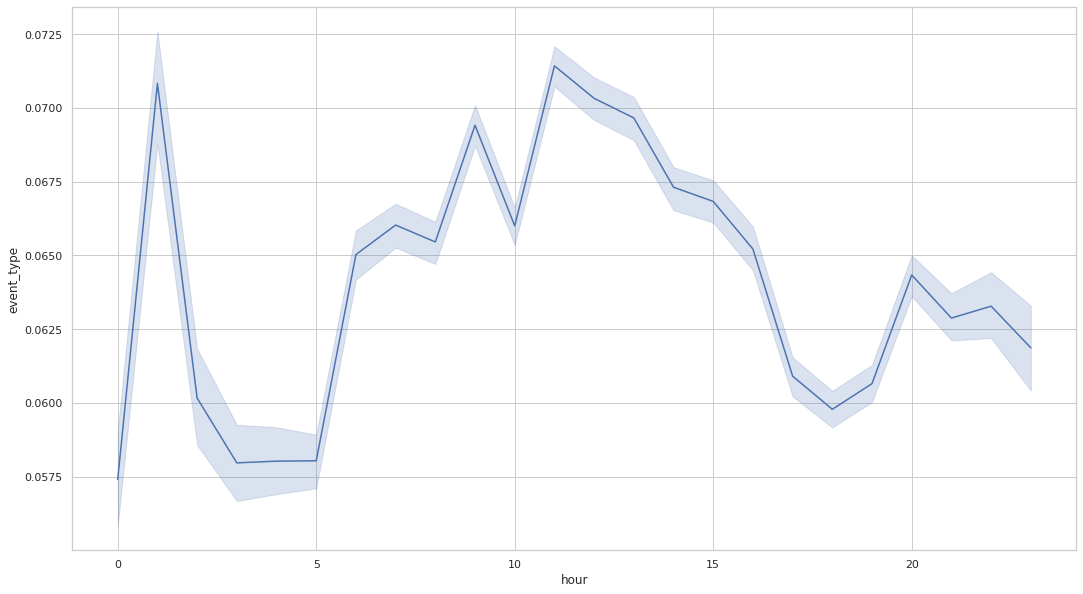

In [ ]:
# top sales hour
plt.figure(figsize=(18,10))
sns.lineplot(data=df , x ='hour', y = df['event_type']=='purchase')

# top sales hour
# plt.figure(figsize=(10,4))
# df[df['event_time']=='purchase'].groupby(['hour'])['price'].sum().sort_values(ascending=False).iplot(kind='line')

As we can see from the above graph, there are usually two peaks in a day which happens around 10 AM to 2PM and then again the peak starts from 6PM to 8PM. Knowing the marketing spent through out the day, and conversion rate arouund these hours, we can target campaigns (especially conversion campaigns) to run specifically targeting highly converting hours.

This peak hours generally translates to lunch break, and post work. Thus having high traffic at these hours makes sense.

### WEEKDAY COLUMN

##### MOST TRAFFIC DAY

In [ ]:
# most sales days
df[df['event_type'] == 'purchase'].groupby(['weekday'],as_index=False)['price'].count().sort_values(ascending = False,by='price')


,weekday,price
0,Friday,101449
4,Thursday,100258
6,Wednesday,77535
5,Tuesday,76848
2,Saturday,72364
3,Sunday,71412
1,Monday,68175


In [ ]:
# plt.figure(figsize=(12,5))
# sns.lineplot(data= df[df['event_type'] == 'purchase'], x= 'weekday', y = 'price')
# top sales days
plt.figure(figsize=(10,4))
df[df['event_type'] == 'purchase'].groupby(['weekday'])['price'].sum().sort_values(ascending=False).iplot(kind='line')

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Axes: xlabel='date', ylabel='price'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 [Text(0, 0, '2019-10-01'),
  Text(1, 0, '2019-10-02'),
  Text(2, 0, '2019-10-03'),
  Text(3, 0, '2019-10-04'),
  Text(4, 0, '2019-10-05'),
  Text(5, 0, '2019-10-06'),
  Text(6, 0, '2019-10-07'),
  Text(7, 0, '2019-10-08'),
  Text(8, 0, '2019-10-09'),
  Text(9, 0, '2019-10-10'),
  Text(10, 0, '2019-10-11'),
  Text(11, 0, '2019-10-12'),
  Text(12, 0, '2019-10-13'),
  Text(13, 0, '2019-10-14'),
  Text(14, 0, '2019-10-15'),
  Text(15, 0, '2019-10-16'),
  Text(16, 0, '2019-10-17'),
  Text(17, 0, '2019-10-18'),
  Text(18, 0, '2019-10-19'),
  Text(19, 0, '2019-10-20'),
  Text(20, 0, '2019-10-21'),
  Text(21, 0, '2019-10-22'),
  Text(22, 0, '

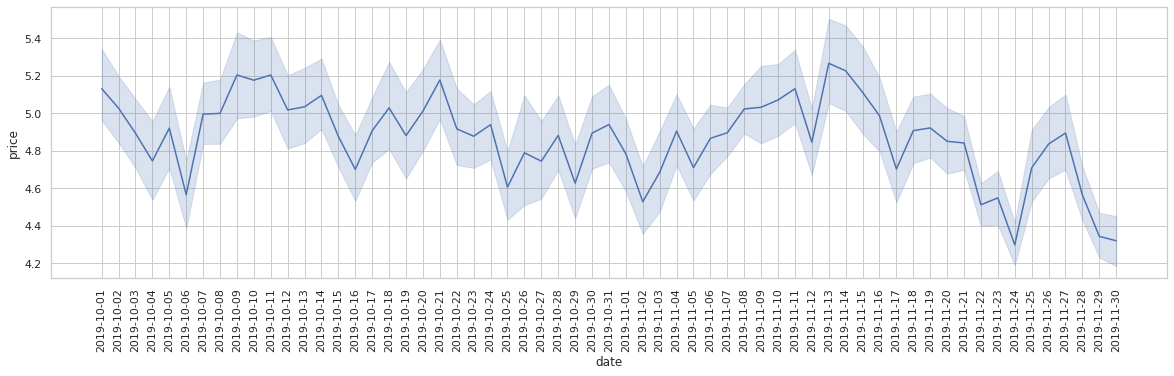

In [ ]:
# purchases by date
plt.figure(figsize=(20,5))
sns.lineplot(data= df[df['event_type'] == 'purchase'], x= 'date', y = 'price')
plt.xticks(rotation=90)
plt.show()

As we can see from the above graph, there are usually two peaks in a date which happens in 15-11-2019  and then again the peak in 8-10-2019. Knowing the marketing spent through out the day, and conversion rate arouund these dates, we can target campaigns (especially conversion campaigns) to run specifically targeting highly converting dates

This peak hours generally translates to lunch break, and post work. Thus having high traffic at these hours makes sense.

In [ ]:
# figure, axis = plt.subplots(nrows=2,ncols=2)
# figure.set_size_inches(10,9)
# sns.barplot(data=df,x='year',y='price',ax=axis[0,0])
# sns.lineplot(data=df,x='month',y='price',ax=axis[0,1])
# sns.barplot(data=df,x='hour',y='price',ax=axis[1,0])
# sns.barplot(data=df,x='weekday',y='price',ax=axis[1,1])
# axis[1,0].tick_params(axis='x',labelrotation=90)

In [ ]:
# top sales hour
plt.figure(figsize=(10,4))
df.groupby(['hour'])['price'].sum().iplot(kind='line')
#df.groupby(['hour'])['price'].sum().sort_values(ascending=False).iplot(kind='line')

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Axes: xlabel='hour', ylabel='price'>

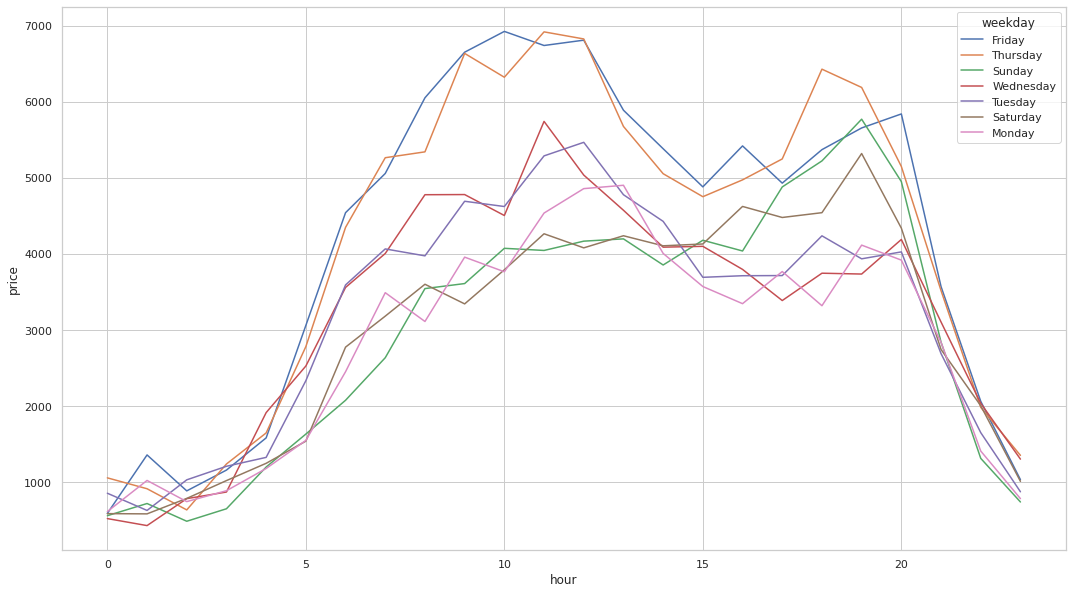

In [ ]:
# trafic hour by day
datahour=df[df['event_type']=='purchase'].groupby(['hour','weekday'],as_index=False)['price'].count().sort_values(ascending = False,by='price')
plt.figure(figsize=(18,10))
sns.lineplot(data=datahour, x = 'hour', y = 'price',hue='weekday')

as we can see 19 the best sales hour


### CUSTOMER ANALYSIS

##### CALCULATE HOW MANY UNIQUE CUSTOMERS WE HAVE

In [ ]:
customer_info = df[['user_id','event_type']]
unq = list(customer_info['user_id'].unique())
print('unique_customer ',len(unq))

unique_customer  713100


##### THE MOST VALUABLE CUSTOMERS

Text(0.5, 0, 'user_id')

Text(0, 0.5, 'price')

<BarContainer object of 30 artists>

[Text(0.5, 0, '579944216'),
 Text(1.5, 0, '579925377'),
 Text(2.5, 0, '579924768'),
 Text(3.5, 0, '579916096'),
 Text(4.5, 0, '579906406'),
 Text(5.5, 0, '579903865'),
 Text(6.5, 0, '579900887'),
 Text(7.5, 0, '579886439'),
 Text(8.5, 0, '579877742'),
 Text(9.5, 0, '579875714'),
 Text(10.5, 0, '579870036'),
 Text(11.5, 0, '579866859'),
 Text(12.5, 0, '579863645'),
 Text(13.5, 0, '579857098'),
 Text(14.5, 0, '579855358'),
 Text(15.5, 0, '579849574'),
 Text(16.5, 0, '579847706'),
 Text(17.5, 0, '579847583'),
 Text(18.5, 0, '579845482'),
 Text(19.5, 0, '579841776'),
 Text(20.5, 0, '579840637'),
 Text(21.5, 0, '579839580'),
 Text(22.5, 0, '579838645'),
 Text(23.5, 0, '579838202'),
 Text(24.5, 0, '579838067'),
 Text(25.5, 0, '579837989'),
 Text(26.5, 0, '579837845'),
 Text(27.5, 0, '579834562'),
 Text(28.5, 0, '579834429'),
 Text(29.5, 0, '579827728')]

Text(0.5, 1.0, 'Top 30 customer')

[Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '10'),
 Text(0, 0, '4'),
 Text(0, 0, '10'),
 Text(0, 0, '48'),
 Text(0, 0, '1'),
 Text(0, 0, '20'),
 Text(0, 0, '4'),
 Text(0, 0, '17'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

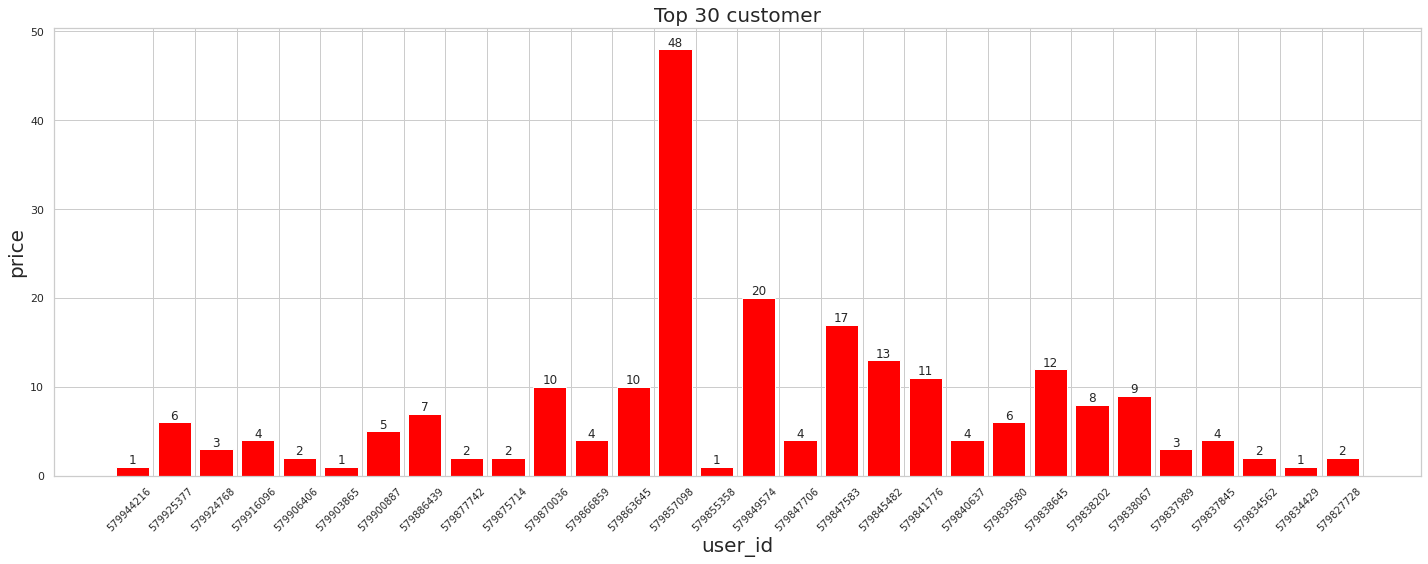

In [ ]:
df_purchase = df[df['event_type'].str.contains(r'purchase')]
event_type_count5 = df_purchase.groupby(["user_id"]).count()
event_type_count5.drop(["event_time","event_type","month"], axis = 1, inplace=True)
event_type_count5.sort_values(by='user_id', ascending=False, inplace=True)
event_type_count5['user_id'] = event_type_count5.index
event5 = event_type_count5.head(30)

####
sns.set_theme(style = 'whitegrid')

x = event5["user_id"]
y = event5["price"]
fig, ax = plt.subplots(figsize=(20,8))

plt.xlabel("user_id",size=20)
plt.ylabel("price",size=20)

ax.bar([idx for idx in range(len(x))], y, color='red')
ax.set_xticks([idx+0.5 for idx in range(len(x))])
ax.set_xticklabels(x, rotation=45, ha='right', size=10)
ax.set_title("Top 30 customer", size=20)
for bars in ax.containers:
    ax.bar_label(bars)
fig.tight_layout()

##### TOP 20 CUSTOMER PURCAHSES

In [ ]:
df[df['event_type']=='purchase'].groupby('user_id')['price'].sum().reset_index().head(20).sort_values(ascending = False,by='price')

,user_id,price
8,33535391,138.88
14,36180886,89.67
4,19762782,80.29
2,10280338,54.83
5,28048440,49.38
17,40409101,44.50
6,29025780,41.68
18,40821287,34.71
9,33609704,31.31
11,34236465,28.19


###### SEE THE NUMBER OF EACH EVENT TYPE DONE BY USER USING CROSS TABULATION

In [ ]:
table=pd.crosstab(df['user_id'],df['event_type'])
display(table.sort_values(by='purchase',ascending=False).head(20))

event_type,cart,purchase,remove_from_cart,view
user_id,,,,
557790271,844,438,381,283
546827800,357,329,702,10
549507462,325,256,95,4
566576008,930,236,347,56
473313149,402,230,49,32
480463194,472,217,162,17
514908450,8,214,4,0
549368055,192,208,95,57
538022131,676,207,898,268


##### SEE THE SALES MADE BY EACH USER

In [ ]:
customer_sales = pd.DataFrame(df[df['event_type'] == 'purchase'].groupby('user_id').sum()['price'].sort_values(ascending = False).reset_index())
customer_sales
purchased = df[df['event_type'] == 'purchase']

,user_id,price
0,557790271,2715.87
1,150318419,1645.97
2,562167663,1352.85
3,531900924,1329.45
4,557850743,1295.48
...,...,...
52518,549736485,0.03
52519,545859098,-0.16
52520,574878046,-1.03
52521,461943726,-2.73


In [ ]:
df[df['product_id'] == 5809910].groupby('date')['price'].sum().reset_index().iplot(kind='line')

##### CALCULATE HOW MANY TIMES EACH USER USED THE SYSTEM 

In [ ]:
df['user_id'].value_counts()

527021202    11786
550388516     7268
552908674     4475
510369366     4069
500179293     4037
             ...  
567021443        1
562285363        1
494256023        1
567021091        1
540006764        1
Name: user_id, Length: 713100, dtype: int64

##### CALCULATE HOW MANY USERS PURCHASED A SPECIFIC BRAND

In [ ]:
counts = df[df['event_type'] == 'purchase'].groupby(['brand'])['user_id'].count().sort_values(ascending = False).reset_index()
counts

,brand,user_id
0,irisk,71288
1,runail,63920
2,masura,39705
3,bpw.style,23755
4,ingarden,23497
...,...,...
230,ibd,3
231,dorena,3
232,radius,2
233,bosnic,1


In [ ]:

most_loyal_brand = counts.index[0]
print("The brand with the most loyal customers is:", most_loyal_brand)

The brand with the most loyal customers is: 0


##### CALCULATE HOW MANY USERS PURSHASED THE TOP 10 BRANDS

In [ ]:
df.groupby(['event_type'])['price'].mean().sort_values(ascending = False).head(10).iplot(
    kind="bar",
    yTitle="average price",
    linecolor="black",
    title="AVERAGE PRICE FOR EACH EVENT TYPE",
)

Because of being noticed that only 6.5% of the users purchase products and 45.1% view products ,so the reason may be the average price of the products , this visualization shows that the average purchased products price is 4.8 while the average viewed products price is 12.1 , this huhe difference may be the direct reason why most of users only view products. 

In [ ]:
df[df['event_type'] == 'purchase'].groupby(['brand'])['user_id'].count().sort_values(ascending = False).head(10).iplot(
    kind="bar",
    yTitle="Number of USERS",
    linecolor="black",
    title="BRANDS BY USERS",
)

##### LOYALITY SCORE

In [ ]:
top_purchase['customer_score'] = top_purchase['purchase'] * 300 + top_purchase['cart'] * 5 + top_purchase['view']
top_purchase

,purchase,cart,view,customer_score
0,438,844,283,135903
1,329,357,10,100495
2,256,325,4,78429
3,236,930,56,75506
4,230,402,32,71042
...,...,...,...,...
9995,16,33,42,5007
9996,16,16,3,4883
9997,16,48,216,5256
9998,16,26,9,4939


In [ ]:
# Calculate repeat purchase rate
total_customers = len(top_purchase)
repeat_customers = len(top_purchase[top_purchase['purchase'] > 1])
repeat_purchase_rate = repeat_customers / total_customers

print('Repeat purchase rate:', repeat_purchase_rate)

# Calculate customer lifetime value (CLV)
avg_order_value = top_purchase['purchase'].mean()
purchase_frequency = len(top_purchase) / top_purchase['purchase'].sum()
customer_lifetime = 1 / (1 - purchase_frequency)
CLV = avg_order_value * customer_lifetime

print('Customer lifetime value:', CLV)
# df['customer_scoer'].describe()
# Calculate loyalty score based on customer scoring
max_score = 100475 # max_score
min_score = 2400 # min_scoer 
top_purchase['loyalty_score'] = (top_purchase['customer_score'] - min_score) / (max_score - min_score)

top_purchase

Repeat purchase rate: 1.0
Customer lifetime value: 32.758445832668855


,purchase,cart,view,customer_score,loyalty_score
0,438,844,283,135903,1.361234
1,329,357,10,100495,1.000204
2,256,325,4,78429,0.775213
3,236,930,56,75506,0.745409
4,230,402,32,71042,0.699893
...,...,...,...,...,...
9995,16,33,42,5007,0.026582
9996,16,16,3,4883,0.025317
9997,16,48,216,5256,0.029121
9998,16,26,9,4939,0.025888


### PRODUCT ANALYSIS

##### SEE THE NUMBER  & TYPE OF EACH EVENT BY PRODUCT USING CROSS TABULATION

In [ ]:
prod=pd.crosstab(df['product_id'],df['event_type'])
prod.head(10)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
3752,0,0,0,23
3762,441,114,249,933
3763,63,12,33,208
3771,0,0,0,14
3774,161,43,77,398
3776,38,7,36,168
3783,0,0,0,6
3788,0,0,0,2
3790,0,0,1,26


**In this cross-tabulation**, we can see how many times each product has been 
added to the cart, how many times it has been followed, and how many times it has been viewed.

##### CALCULATE THE MEAN SALES MADE BY EACH PRODUCT

In [ ]:
pd.pivot_table(df,index=['product_id'],values=['price'],aggfunc=np.mean)

,price
product_id,
3752,15.710000
3762,19.174548
3763,15.974177
3771,15.080000
3774,15.925361
...,...
5909241,2.152500
5909242,1.526667
5909244,1.975000


In [ ]:
df["price"].iplot(
    kind="hist",
    bins=30,
    xTitle="price",
    linecolor="black",
    yTitle="count",
    title="price Distribution",
)

In [ ]:

# iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, 
#       filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)

##### Trends in products

THIS CODE SHOW IF THERE IS ANY TRENDS IN THE PRODUCT SALES IN A SPECIFIC DAY OR A SPECIFIC HOUR

In [ ]:
days = [unique for unique in df.weekday.unique()]
days

In [ ]:
def plot_trend(days:list, df):
    for day in days:
        new_df = df[df['weekday'] == day]
        new_df.groupby(['hour'])['product_id'].value_counts().iplot(linewidth=1.2, 
                                           yTitle='Product Sold count', 
                                             xTitle='product per hour', 
                                             title='Product Trend On '+day+' Day');
plot_trend                                             

<function __main__.plot_trend(days: list, df)>

In [ ]:
plot_trend()

Output hidden; open in https://colab.research.google.com to view.

##### Trends in Sales By Week Days

HERE WE WANT TO SEE & COMPARE THE SALES OF THE SAME WEEKDAY DURING THE 2 MONTHS OCTBER & NOVEMBER

In [ ]:
def plot_trend(days:list, df):
    for day in days:
        new_df = df[df['weekday'] == day]
        new_df.groupby('date')['price'].sum().iplot(linewidth=1.2, 
                                           yTitle='product', 
                                             xTitle='date', 
                                             title='Sales On '+day+' Day')

**What are the trends been identified ?**

---



When ever we have more users viewing we would have more users Purchasing based on our finding.

From mid of December we saw a strong decrease until new year.

Our analysis shows that Thursdays remain the best day of the week for online sales. the online shop on Thursdays see a rate 33.75% higher on revenue than the lowest day of the week which is Saturdays.

Our analysis show:

Sales increased 6.37% between October to November.

---



Many users tend to remove products from their cart. I believe the number is huge and the company needs to invest more on that.

---



---



Users tend to have more activities during the middle of the day than the beginning or the end of the day. the peak hour is at 11AM and 7PM

Our analysis show that there are 110,518 users who at least puchese one or more products.

10.33% are new users with only 1 product purchased which equal to 11,417 users.

58.44% are mid level users with less than 8 products purchased which equal to 64,585 users.

27.86% are active users with less than 420 products purchased which equal to 30,785 users.

3.37% are very active users with more than 40 products purchased which equal to 3,731 users.

How could these trends help influence the marketing strategy? 

Knowing when to promote products can be a challenge for ecommerce brands. Targeting customers at the right time on the right platform and knowing the best days of the week to sell online can help us attract more customers and drive sales.

from our analysis we found out that the best days to drive sales is on the weekdays especially Thursdays. The marketing team can develop strategies to promote some of the products (chose from the top 30 products graph) at Thursday.

from our analysis we found out that The most consistent engagement is observed on weekdays between 7 am to 12 pm and 4 pm to 8 pm, while the lowest engagement is on Saturdays and Sundays full day.

With Dash this notebook can be transformed to an interactive web applications where stockholders, marketing team and other departments can access a daily reports, look for trends or insights and extract data easily